In [1]:
import pandas as pd
import seaborn as sns

In [17]:
diamonds = sns.load_dataset("diamonds")

In [15]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
# check how many diamonds are each color grade
diamonds["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [20]:
#subset of colorless diamonds
colorless = diamonds[diamonds["color"]. isin(["E", "F", "H", "D", "I"])]

#select only color and price columns, reset index
colorless = colorless[["color", "price"]].reset_index(drop = True)

##### We took a subset of colorless and near colorless diamonds. We excluded G color grade diamonds as there were many more of them, and we exlcluded J color grade diamonds as there were significantly fewer of them

In [22]:
# remove dropped categories of diamond color

colorless.color = colorless.color.cat.remove_categories(["G", "J"])

#check that the dropped categories have been removed
colorless["color"].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [24]:
#import math package
import math

#take the loagrithm of the price, and insert it as the third column
colorless.insert(2, "log_price", [math.log(price) for price in colorless["price"]])

In [26]:
# Drop rows with missing values
colorless.dropna(inplace = True)

#reset index
colorless.reset_index(inplace = True, drop = True)

In [27]:
colorless.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


In [28]:
#save to diamonds.csv

colorless.to_csv('diamonds.csv', index = False, header = list (colorless.columns))

#### To run one-way ANOVA, we first load in the data, and save it as a variable called diamonds, and then examine it using the head() function

In [29]:
# Save diamonds.csv as variable called diamonds

diamonds = pd.read_csv("diamonds.csv")

In [31]:
#Examine first five rows of diamonds data set
diamonds.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


In [32]:
#save to diamonds.CSV

colorless.to_csv('diamonds.csv', index=False, header=list(colorless.columns))

#### One-Way Anova
1-Load Data and Save it as a Variable Called Diamond

2- examine using head function

In [33]:
# Save diamonds.csv as a variable called diamonds
diamonds = pd.read_csv("diamonds.csv")

In [35]:
diamonds.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


In [36]:
## Recall that one-way ANOVA helps us better understand the relationship between a categorical 
#variable and a continuous variable.

<AxesSubplot:xlabel='color', ylabel='log_price'>

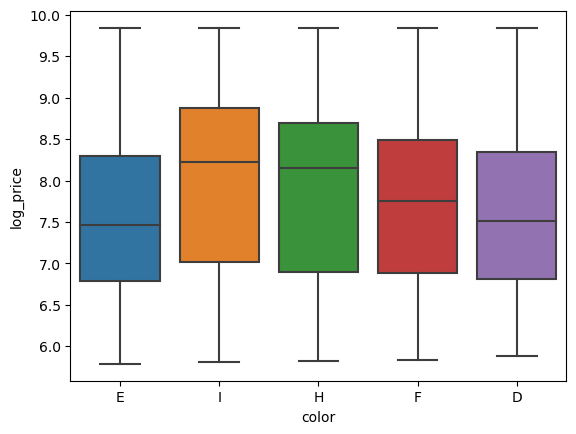

In [37]:
# Create boxplot to show distribution of price by color grade

sns.boxplot( x = "color", y = "log_price", data = diamonds)

#### In order to run ANOVA, we need to create a regression model. 
To do this, we'll import the statsmodels.api package and the ols() function. 
Next, we'll create a simple linear regression model where the X variable is color, 
which we will code as categorical using C().
Then, we'll fit the model to the data, and generate model summary statistics.

In [39]:
# Import Statsmodels and ols function
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
#construct simple linear regression model. and fit the model
model = ols(formula = "log_price ~ C(color)", data = diamonds). fit()

# the dependent variable is log_price, and it is being regressed against the categorical variable color. 
#The C() function is used to treat color as a categorical variable rather than a continuous variable.

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          3.61e-225
Time:                        15:22:02   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
Based on the model summary table, the color grades' associated beta coefficients all have a p-value of less than 0.05 (check the P>|t| column). 

But we can't be sure if there is a significant price difference between the various color grades. This is where one-way ANOVA comes in.

First, we have to state our null and alternative hypotheses:



### Null Hypothesis

$$H_0: price_D=price_E=price_F=price_H=price_I$$

There is no difference in the price of diamonds based on color grade.

### Alternative Hypothesis

$$H_1: \text{Not } price_D=price_E=price_F=price_H=price_I$$

There is a difference in the price of diamonds based on color grade.

In [42]:
# Run one-way ANOVA

sm.stats.anova_lm(model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.690290,260.422572,264.987395,3.609774e-225
Residual,39835.0,39148.779822,0.982773,NaN,NaN


In [43]:
sm.stats.anova_lm(model, type = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.690290,260.422572,264.987395,3.609774e-225
Residual,39835.0,39148.779822,0.982773,NaN,NaN


In [44]:
sm.stats.anova_lm(model, type = 3)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.690290,260.422572,264.987395,3.609774e-225
Residual,39835.0,39148.779822,0.982773,NaN,NaN


### Data cleaning II 

In this part of the notebook, we will prepare a second dataset so we can perform a two-way ANOVA, which requires two categorical varaibles. We will start with the same diamonds dataset from the seaborn package.

In [45]:
#Import diamonds data set from seaborn package
diamonds = sns.load_dataset("diamonds")

In [46]:
#Examine first 5 rows of data set
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Below, we go through a very similar process as above.
We start by selecting the columns of interest:
color, cut, and price.
Then, we subset only for certain color grades,
and remove the dropped colors from the list of categories using the remove_categories() function.

Next, we subset for specific diamond cuts:
Ideal, Premium, and Very Good, and remove the dropped cuts from the list of categories.

Next, we remove rows with missing data, and reset the index.

In [60]:
#subset for color,cut,price columns

diamonds2 = diamonds[["color", "cut","price"]]

#only include colors diamonds
diamonds2 = diamonds2[diamonds2["color"]. isin(["E","F","H", "D", "I"])]

#Drop removed colors,G and J
diamonds2.color = diamonds2.color.cat.remove_categories(["G", "J"])

#Only include ideal, premium, and very good diamonds
diamonds2 = diamonds2[diamonds2["cut"]. isin(["Ideal", "Premium", "Very Good"])]

#Drop Removed cuts
diamonds2.cut = diamonds2.cut.cat.remove_categories(["Good", "Fair"])

#Drop Nans
diamonds2.dropna(inplace=True)

#Reset Index
diamonds2.reset_index(inplace = True, drop = True)

#Add column for logarithm of price
diamonds2.insert(3, "log_price", [math.log(price) for price in diamonds2["price"]])

In [61]:
diamonds2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


In [62]:
# Save as diamonds2.csv
diamonds2.to_csv('diamonds2.csv',index=False,header=list(diamonds2.columns))

### Two-Way Anova


In [66]:
diamonds2 = pd.read_csv("diamonds2.csv")

In [67]:
# Examine the first 5 rows of teh data set
diamonds2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


 create a multiple linear regression model using the ols() function, fit the model to the data, and get the summary statistics.

Note: This regression model includes two categorical X variables: color and cut, and a variable to account for the interaction between color and cut. The interaction is denoted using the : symbol.

In [69]:
#Construct a multiple linear regression with an interaction term between cut and color

model2 = ols(formula = "log_price ~ C(color) + C(cut) + C(color):C(cut)", data = diamonds2).fit()

In [70]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sun, 25 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:29:23   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.166      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.775      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.564      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.888   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.556
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
#Run 2-way Anova
sm.stats.anova_lm(model2, type = 2)

#the p-value (PR>F) is too small so there is significant relatioshiop

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,977.195814,244.298954,250.021037,3.747388e-212
C(cut),2.0,630.641441,315.320721,322.706309,1.348511e-139
C(color):C(cut),8.0,27.478611,3.434826,3.515279,4.531734e-04
Residual,34920.0,34120.806577,0.977114,NaN,NaN


In [72]:
sm.stats.anova_lm(model2, type = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,977.195814,244.298954,250.021037,3.747388e-212
C(cut),2.0,630.641441,315.320721,322.706309,1.348511e-139
C(color):C(cut),8.0,27.478611,3.434826,3.515279,4.531734e-04
Residual,34920.0,34120.806577,0.977114,NaN,NaN


In [73]:
sm.stats.anova_lm(model2, type = 3)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,977.195814,244.298954,250.021037,3.747388e-212
C(cut),2.0,630.641441,315.320721,322.706309,1.348511e-139
C(color):C(cut),8.0,27.478611,3.434826,3.515279,4.531734e-04
Residual,34920.0,34120.806577,0.977114,NaN,NaN


#### Anova Post Hoc Test

In [76]:
# impport statsmodel package and ols function

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [77]:
#Load in the data set from one-way ANOVA

diamonds = pd.read_csv("diamonds.csv")

### One_Way ANOVA

follow the same steps as above:

    1- Build a simple Linear regression model
    
    2- Check the results
    
    3- Run one-Way ANOVA

In [78]:
#Construct simple linear regression model, and fit the model
model = ols(formula = "log_price ~ C(color)", data = diamonds). fit()

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          3.61e-225
Time:                        11:23:43   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#Run one-WAy Anova

sm.stats.anova_lm(model, type =2)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.690290,260.422572,264.987395,3.609774e-225
Residual,39835.0,39148.779822,0.982773,NaN,NaN


Since the p-value is very small and we can reject the null hypothesis 

,that the mean price is the same for all diamond color grades, 

we can continue on to run a post hoc test.

The post hoc test is useful because the one-way ANOVA does not tell us 

which colors are associated with different prices. 

The post hoc test will give us more information.


#### Post hoc test: 
    There are many post hoc tests that can be run. One of the most common ANOVA post hoc tests is the Tukey's HSD (honestly significantly different) test. We can import the pairwise_tukeyhsd() function from the statsmodels package to run the test.

In [81]:
#Import Turkey's HSD function

from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### Hoe We Do That?
    Then we can run the test. The endog variable specifies which variable is being compared across groups, which is log_price in this case. Then the groups variables indicates which variable holds the groups we're comparing, which is color. alpha tells the function the significance or confidence level, which we'll set to 0.05. We'll aim for the typical 95% confidence level.

In [82]:
# Run Tukey's post hoc test for one-way ANOVA

tukey_oneway = pairwise_tukeyhsd(endog = diamonds["log_price"], groups = diamonds["color"],
                                 alpha = 0.05)

In [83]:
# Get the results (PairWise Comparison)

tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1169,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.183,0.0,0.1441,0.2219,True
E,H,0.339,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True


In [ ]:
# Based on result except from D,E group we can say about other groups that the price is diffrent.